Before we start: please fill out our weekly attendance form! https://forms.gle/njrwXR9r416yzXnn7

Fall quarter outline:

* Week 3: Introduction
* Week 4: Data retrieval and preparation
* Week 5: Exploratory data analysis (EDA)
* Week 6: Modeling and machine learning, part 1
* Week 7: Modeling and machine learning, part 2
* *Week 8: Thanksgiving*
* **Week 9: Neural networks**
    * Quick recap
    * What are neural networks?
    * How do they work?
    * Code example

<img src="https://miro.medium.com/max/1200/1*eE8DP4biqtaIK3aIy1S2zA.png" width="800">

# Recap

During our previous two meetings, we introduced what **machine learning** is and went over examples using several different **algorithms** for different types of problems. You should remember the difference between **unsupervised** and **supervised** learning, as well as the two types of supervised learning, **regression** and **classification**.

The different algorithms we've covered thus far include:
* Unsupervised: PCA and K-means
* Classification: KNN, naive Bayes, decision trees, logistic regression
* Regression: KNN, decision trees, linear models

<span style="font-size:8pt;">
(The usual disclaimer: <b>we are not covering every single ML algorithm!</b> You can find a pretty comprehensive list at the <a href="https://scikit-learn.org/stable/user_guide.html">scikit-learn user guide</a>.)
</span>

You should also remember how use `sklearn` for various steps in the machine learning process, including **train-test split**, **cross-validation**, and importing and **fitting a model**, as well as why we perform those steps.

To build up our intuition of how neural networks are set up, let's review **logistic regression**.

As you may recall, in logistic regression, we take an observation $\vec{x} = (x_1, \dots, x_n)$ and for each possible category, we feed a linear combination of the predictors $z=w_0 + w_1 x_1 + \ldots + w_n x_n$ into the **sigmoid** function $\sigma(z) = \dfrac{1}{1+e^{-z}}$. The value $y(\vec{x}) = \sigma(z)$ is the predicted probability of the observation belonging to a specific class. To classify an observation, we take the class for which $y(\vec{x})$ is greatest.

If there are 3 predictors, we can represent that as a network like this:

<img src="https://miro.medium.com/max/480/1*VLjBYlRR2-WtsUPDVr7YUA.png" width="500">

The coefficients $w_1, \ldots, w_n$ can be thought of as a **weight** for each of the features, while the constant $w_0$ (or $b$) can be thought of as a **bias** for the intermediate value $z$. The function $\sigma(z)$ is called an **activation function** because it takes $z$ and produces an output for our network.

# What are neural networks?

When we left off last time, we mentioned that neural networks are a different type of supervised learning algorithm. Well, that's not entirely true! You can use neural networks for almost anything: unsupervised, supervised, and even reinforcement learning. But our focus here will be on supervised neural networks.

As we've already seen, every single supervised learning algorithm tries to learn the parameters of a specific kind of *function* that maps input observations to target values (for both classification and regression). Neural networks are no different!

<img src="https://upload.wikimedia.org/wikipedia/commons/4/44/Neuron3.png?1607047928616" width="500px"></img>

A **neural network** is basically a complicated function that takes inputs and performs a sequence of computations &mdash; with each calculation based on the results of the previous step &mdash; until it gives an output. 

<img src="https://ml4a.github.io/images/figures/mnist_2layers.png" width="800">

In the picture above, 
* Each circle is a **neuron** (or node), each column of circles is a **layer**
* Each neuron is connected to all neurons in previous layer 
* First layer = **input layer**
* Last layer = **output layer**
* Middle layers = **hidden layers**


# How do neural networks work?

For our example we're going to use the **MNIST** (Modified National Institute of Standards and Technology) database of handwritten digits. [MNIST is like the "Hello, World" of **deep learning**.]

# About our example:
## Layers and the calculations between them

  <img src="https://i.imgur.com/KwIfMn1.png" width="600">

- Each digit is rendered on a $28 \times 28 = 784$ pixel grid, with a grayscale value between 0 and 1
- **Input layer**: 784 neurons, activation determined by grayscale value between 0 and 1
  - **Activation**: value that correspond with how brightly lit a neuron, activations in 1 layer cause activations in the next layer
    - Higher value = more brightly lit
  - **Neuron/node**: think of as function that takes all outputs from previous layer, returns number between 0 and 1
- **Hidden layers**: 2 layers between input layer and output layer, 1st hidden layer picks up on edges, 2nd hidden layer picks up on patterns like loops/lines
  - For each neuron in each hidden layer, activation is based on weighted sum of all activations in previous layer (reason for connection), plus bias
    - **Weights**: assigned to each connection between neurons, choose their value to determine which part of the image is important, can be positive or negative, tell you what pixel pattern a neuron is picking up on, like strength of connection
    - **Bias**: how high weighted sum must be before neuron is meaningfully active, tells whether neuron tends to be active or inactive 
  - Use matrix multiplication to get sum
    - Weight matrix: each row corresponds to connections between 1 layer and 1 specific neuron in next layer, # rows = # neurons in next layer
    
      <img src=https://i.imgur.com/YujTl0D.png width="500">

  - Transform sum with sigmoid function or ReLU (called an activation function)
    - Sigmoid function: squishes values to be between 0 and 1
    
      <img src=https://i.imgur.com/U3gXMVG.png width="500">

    - Not really used anymore, ReLU is preferred 
    
      <img src=https://i.imgur.com/nRE3rka.png width="500">

- Output layer: pieces together patterns to recognize digits
  - 10 values between 0 and 1, value close to 1 means neural network thinks that’s the digit that was written

##Learning: finding right weights and biases
  - To train: can start off with random weights and biases, show many different images of handwritten digits with labels for what they’re supposed to be
    - Neural network will adjust its weights and biases to improve based on this data
  - To test: show more handwritten digits it’s never seen before
  - To measure performance: use L=loss function: sum of squared differences between neural network’s output values and what they should be

  <img src=https://i.imgur.com/QJWCua1.png width="500">

## Loss function
- Input is all weights and biases (since they determine the output values), output is 1 value
  - L is small when image is classified correctly, vice versa
- Want weights/biases that minimize loss function

## Gradient descent
- Gradient descent: iterative optimization algorithm for finding local min
  - Compute gradient (vector that shows direction and rate of fastest increase)
  - Take small step in direction opposite of gradient (like taking little steps down a hill)
    - Equivalent to changing certain weights and biases by a small amount
  - Repeat many times until min is found

    <img src=https://i.imgur.com/WkDmu5Y.png width="500">
  
- Gradient tells which changes to which weights/biases matter most
  - Magnitude of each component tells you how sensitive cost function is to each weight and bias
  - Component with high magnitude = changing weight/bias associated with it will have large effect on loss value

## Back propagation: algorithm for finding gradient
- Conceptually: evaluates the expression for the derivative of the cost function as a product of derivatives between each layer from left to right – "backwards" – with the gradient of the weights between each layer being a simple modification of the partial products (from Wikipedia)
- Mathematically: a lot of derivatives, matrix multiplication, and element-wise multiplication 










# Coding a neural network

Our favorite machine learning library, scikit-learn, comes with two supervised machine learning algorithms built in. These are [MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) and [MLPRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html), which perform classification and regression respectively. MLP stands for "Multi-Layer Perceptron", which is just another name for the type of neural network we described earlier.

The dataset we'll be using is one that's built-in to `sklearn`. It comes from the NIST (National Institute of Standards and Technology) database of handwritten digits. Loading it in:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits

data = load_digits()
print(data.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [ ]:
X, y = data.images, data.target_names[data.target]

print('X:', '\n', X)
print('')
print('y:', y)

print('')
print('X.shape:', X.shape)
print('y.shape:', y.shape)

X: 
 [[[ 0.  0.  5. ...  1.  0.  0.]
  [ 0.  0. 13. ... 15.  5.  0.]
  [ 0.  3. 15. ... 11.  8.  0.]
  ...
  [ 0.  4. 11. ... 12.  7.  0.]
  [ 0.  2. 14. ... 12.  0.  0.]
  [ 0.  0.  6. ...  0.  0.  0.]]

 [[ 0.  0.  0. ...  5.  0.  0.]
  [ 0.  0.  0. ...  9.  0.  0.]
  [ 0.  0.  3. ...  6.  0.  0.]
  ...
  [ 0.  0.  1. ...  6.  0.  0.]
  [ 0.  0.  1. ...  6.  0.  0.]
  [ 0.  0.  0. ... 10.  0.  0.]]

 [[ 0.  0.  0. ... 12.  0.  0.]
  [ 0.  0.  3. ... 14.  0.  0.]
  [ 0.  0.  8. ... 16.  0.  0.]
  ...
  [ 0.  9. 16. ...  0.  0.  0.]
  [ 0.  3. 13. ... 11.  5.  0.]
  [ 0.  0.  0. ... 16.  9.  0.]]

 ...

 [[ 0.  0.  1. ...  1.  0.  0.]
  [ 0.  0. 13. ...  2.  1.  0.]
  [ 0.  0. 16. ... 16.  5.  0.]
  ...
  [ 0.  0. 16. ... 15.  0.  0.]
  [ 0.  0. 15. ... 16.  0.  0.]
  [ 0.  0.  2. ...  6.  0.  0.]]

 [[ 0.  0.  2. ...  0.  0.  0.]
  [ 0.  0. 14. ... 15.  1.  0.]
  [ 0.  4. 16. ... 16.  7.  0.]
  ...
  [ 0.  0.  0. ... 16.  2.  0.]
  [ 0.  0.  4. ... 16.  2.  0.]
  [ 0.  0.  5. ... 12. 

There are 1797 observations in total in the dataset. Let's take a look at some random points to see what we're working with:

Indexes: [ 864  392 1347  630 1731   91 1661 1667 1607]
Targets: 
 [[6 6 3]
 [8 4 3]
 [4 0 4]]


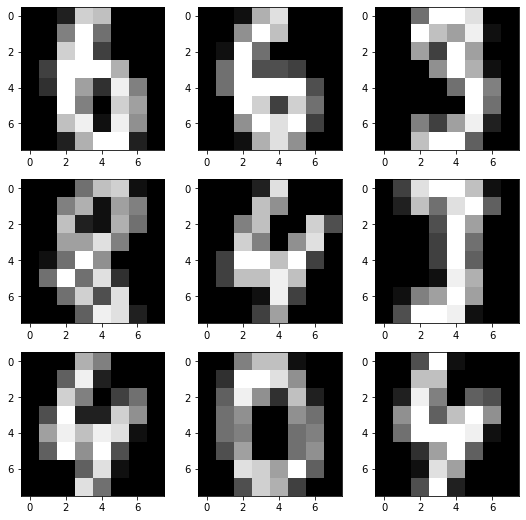

In [ ]:
fig, ax = plt.subplots(3,3, figsize=(9,9))

# pick nine random observations to pull
np.random.seed(2020)
rand_inds = np.random.randint(0, X.shape[0], size=3*3)
print('Indexes:', rand_inds)
print('Targets:', '\n', y[rand_inds].reshape(3,3))

# plot the digits
for i in range(3*3):
    ax[i // 3, i % 3].imshow(X[rand_inds[i]], cmap='gray')
plt.show()

We need to reshape our data before we can feed it through the model:

In [ ]:
X_reshaped = X.reshape(X.shape[0], -1) # (1797, 8, 8) --> (1797, 64)
X_reshaped.shape

(1797, 64)

Performing a train-test split:

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y, test_size=0.2, random_state=100)
X_train.shape

(1437, 64)

According to the [sklearn user guide](https://scikit-learn.org/stable/modules/neural_networks_supervised.html#mlp-tips), `MLPClassifier` is sensitive to feature scaling. So, we'll include `StandardScaler` into our model by building a `Pipeline` which includes the scaler and the neural network itself.

In addition, according to [the documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html), the default argument for `hidden_layer_size` of `MLPClassifier` is `(100,)`, which doesn't make much sense since we have 64 inputs and 10 outputs. Let's choose a hidden layer size of 32, which is roughly halfway between the two.

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

nn = make_pipeline(StandardScaler(), MLPClassifier(hidden_layer_sizes=(32,),
                                                   max_iter=300,
                                                   random_state=0))
nn.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('mlpclassifier',
                 MLPClassifier(activation='relu', alpha=0.0001,
                               batch_size='auto', beta_1=0.9, beta_2=0.999,
                               early_stopping=False, epsilon=1e-08,
                               hidden_layer_sizes=(32,),
                               learning_rate='constant',
                               learning_rate_init=0.001, max_fun=15000,
                               max_iter=300, momentum=0.9, n_iter_no_change=10,
                               nesterovs_momentum=True, power_t=0.5,
                               random_state=0, shuffle=True, solver='adam',
                               tol=0.0001, validation_fraction=0.1,
                               verbose=False, warm_start=False))],
         verbose=False)

In [ ]:
print('Training accuracy:', nn.score(X_train, y_train))
print('Testing accuracy: ', nn.score(X_test, y_test))

Training accuracy: 1.0
Testing accuracy:  0.9833333333333333


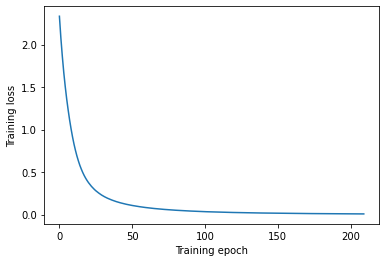

In [ ]:
plt.plot(nn[1].loss_curve_)
plt.ylabel('Training loss')
plt.xlabel('Training epoch')
plt.show()

Let's take a look at which digits in the testing set the model misclassifies:

Predicted:
[[8 5 4]
 [8 8 4]]
Actual:
[[1 8 1]
 [4 7 8]]


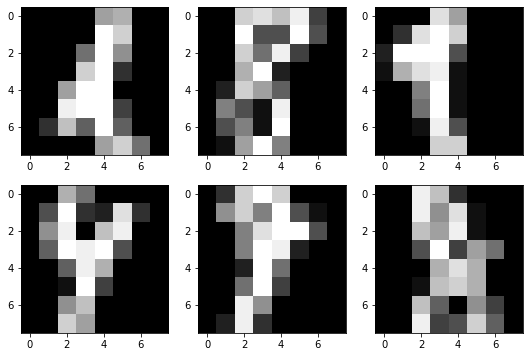

In [ ]:
preds_test = nn.predict(X_test)

wrong_inds = np.where(preds_test != y_test)[0]
print('Predicted:')
print(preds_test[wrong_inds].reshape(2,3))
print('Actual:')
print(y_test[wrong_inds].reshape(2,3))

fig, ax = plt.subplots(2,3, figsize=(9,6))

# plot the digits
for i in range(2*3):
    ax[i // 3, i % 3].imshow(X_test[wrong_inds[i]].reshape(8,8), cmap='gray')
plt.show()

With `sklearn`, however, our options are pretty limited. What if we want to customize our neural network? For example, we could use different activation functions in each layer, or introduce other types of transformations. For that, we need to use a more advanced library specifically made for neural networks.

Two of the most popular libraries for deep learning are [TensorFlow](https://www.tensorflow.org/) and [PyTorch](https://pytorch.org/). I'm going to recreate the same network as above with TensorFlow (using the [Keras](https://keras.io/) interface), with a couple added components.

In [ ]:
import tensorflow as tf

tf.random.set_seed(0) # for reproducibility

model = tf.keras.models.Sequential([
    tf.keras.layers.LayerNormalization(),           # scaler
    tf.keras.layers.Dense(32, activation='relu'),   # hidden layer
    tf.keras.layers.Dense(10, activation='softmax') # output layer
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

hist = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
45/45 [==============================] - 0s 5ms/step - loss: 2.2827 - accuracy: 0.2116 - val_loss: 1.8158 - val_accuracy: 0.4250
Epoch 2/100
45/45 [==============================] - 0s 2ms/step - loss: 1.5424 - accuracy: 0.5762 - val_loss: 1.2399 - val_accuracy: 0.6750
Epoch 3/100
45/45 [==============================] - 0s 2ms/step - loss: 1.0319 - accuracy: 0.7571 - val_loss: 0.7930 - val_accuracy: 0.8361
Epoch 4/100
45/45 [==============================] - 0s 1ms/step - loss: 0.6740 - accuracy: 0.8490 - val_loss: 0.5543 - val_accuracy: 0.8944
Epoch 5/100
45/45 [==============================] - 0s 2ms/step - loss: 0.4769 - accuracy: 0.8935 - val_loss: 0.4189 - val_accuracy: 0.9000
Epoch 6/100
45/45 [==============================] - 0s 2ms/step - loss: 0.3629 - accuracy: 0.9179 - val_loss: 0.3491 - val_accuracy: 0.9111
Epoch 7/100
45/45 [==============================] - 0s 2ms/step - loss: 0.2937 - accuracy: 0.9311 - val_loss: 0.2954 - val_accuracy: 0.9167
Epoch 8/100
4

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer_normalization (LayerNo (None, 64)                128       
_________________________________________________________________
dense (Dense)                (None, 32)                2080      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
Total params: 2,538
Trainable params: 2,538
Non-trainable params: 0
_________________________________________________________________


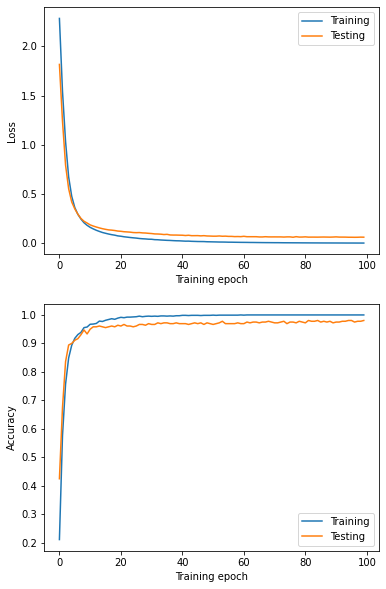

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(6,10))

ax1.plot(hist.history['loss'], label='Training')
ax1.plot(hist.history['val_loss'], label='Testing')
ax1.set_xlabel('Training epoch')
ax1.set_ylabel('Loss')
ax1.legend()

ax2.plot(hist.history['accuracy'], label='Training')
ax2.plot(hist.history['val_accuracy'], label='Testing')
ax2.set_xlabel('Training epoch')
ax2.set_ylabel('Accuracy')
ax2.legend()

plt.show()

In [ ]:
print("Train accuracy:", hist.history['accuracy'][-1])
print("Test accuracy: ", hist.history['val_accuracy'][-1])
print('')
print("Train loss:", hist.history['loss'][-1])
print("Test loss: ", hist.history['val_loss'][-1])

Train accuracy: 1.0
Test accuracy:  0.980555534362793

Train loss: 0.0019895127043128014
Test loss:  0.061547618359327316


# Anonymous feedback

If you have any feedback for us, please let us know! The feedback form is completely anonymous, and we promise we'll take your suggestions into account for future presentations: https://forms.gle/C12vK71RJK6CraZv5

# References

Throughout the quarter, we will mainly be drawing our material from the following sources. Most of your learning will be done through trial and error, so we strongly encourage you to experiment by running code that you write from scratch!

For basic Python:
* The Python Tutorial: https://docs.python.org/3/tutorial/
* Basics of Python 3: https://www.learnpython.org/
* CodeAcademy Python 3 Course: https://www.codecademy.com/learn/learn-python-3

For the rest of the quarter:
* Introducing Data Science: http://bedford-computing.co.uk/learning/wp-content/uploads/2016/09/introducing-data-science-machine-learning-python.pdf 
* Python for Data Analysis: http://bedford-computing.co.uk/learning/wp-content/uploads/2015/10/Python-for-Data-Analysis.pdf 
* Pandas user guide: https://pandas.pydata.org/pandas-docs/stable/user_guide/index.html 
* Sklearn user guide: https://scikit-learn.org/stable/user_guide.html 

Outline of what we're doing

- conceptual background
- how neural networks can be supervised and unsupervised, many different types
- coding examples using sklearn and tensorflow (if we can do both)